In [1]:
pip install pymunk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.7 MB/s eta 0:00:00


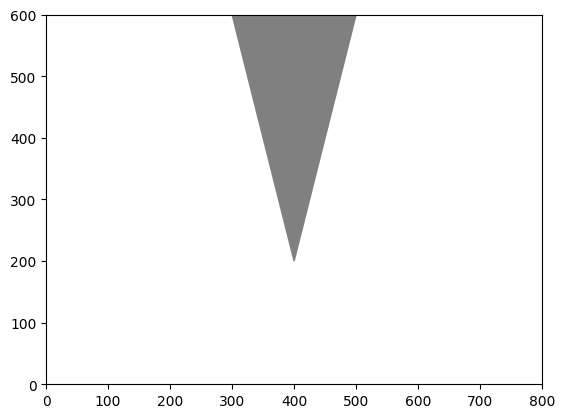

In [4]:
import pymunk
import pymunk.pygame_util
import pygame
import numpy as np
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.pyplot as plt
from matplotlib import patches

# Configuração inicial
pygame.init()
space = pymunk.Space()
space.gravity = (0.0, -900.0)

# Configurações de partículas
num_particles = 500
particle_radius = 2.5
particle_mass = 1
initial_speed = 50

# Função para criar partículas
def create_particle(position, velocity):
    body = pymunk.Body(mass=particle_mass, moment=pymunk.moment_for_circle(particle_mass, 0, particle_radius))
    body.position = tuple(position)
    body.velocity = tuple(velocity)
    shape = pymunk.Circle(body, particle_radius)
    shape.elasticity = 0.9
    shape.friction = 0.1
    space.add(body, shape)
    return shape

# Inicialização de partículas
particles = []
for _ in range(num_particles):
    pos = np.random.rand(2) * np.array([800, 100]) + np.array([0, 500])  # Posição inicial aleatória no topo
    vel = initial_speed * (2 * np.random.rand(2) - 1)  # Velocidade inicial aleatória
    vel[1] = -abs(vel[1])  # Garantir que a velocidade vertical inicial seja para baixo
    particles.append(create_particle(pos, vel))

# Função para criar a cunha
def create_wedge():
    body = pymunk.Body(body_type=pymunk.Body.STATIC)
    body.position = (400, 0)  # Posição da base da cunha em y=0
    points = [(-100, 0), (100, 0), (0, 400)]
    shape = pymunk.Poly(body, points)
    shape.elasticity = 0.9
    shape.friction = 0.1
    space.add(body, shape)
    return shape

# Adiciona a cunha
wedge = create_wedge()

# Função de atualização
def update(space, dt):
    space.step(dt)

# Configuração da animação com matplotlib
fig, ax = plt.subplots()
ax.set_xlim(0, 800)
ax.set_ylim(0, 600)

# Adiciona a cunha ao gráfico
wedge_patch = patches.Polygon([(300, 600), (500, 600), (400, 200)], closed=True, color='gray')
ax.add_patch(wedge_patch)

# Função de animação
def animate(frame):
    update(space, 1/60.0)
    ax.clear()
    ax.set_xlim(0, 800)
    ax.set_ylim(0, 600)
    ax.add_patch(wedge_patch)

    for particle in particles:
        pos = particle.body.position
        circle = patches.Circle((pos.x, 600 - pos.y), particle_radius, color='blue')
        ax.add_patch(circle)
    return ax.patches

# Cria e salva a animação
ani = FuncAnimation(fig, animate, frames=200, interval=20, blit=True)
ani.save('particles_simulation.gif', writer=PillowWriter(fps=24))

plt.show()
pygame.quit()

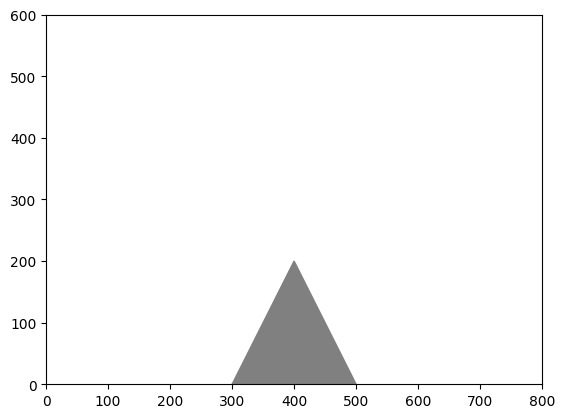

In [ ]:
import pymunk
import pymunk.pygame_util
import pygame
import numpy as np
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.pyplot as plt
from matplotlib import patches

# Configuração inicial
pygame.init()
space = pymunk.Space()
space.gravity = (0.0, 900.0)  # Gravidade para baixo

# Configurações de partículas
num_particles = 50
particle_radius = 2.5
particle_mass = 1
initial_speed = 50

# Função para criar partículas
def create_particle(position, velocity):
    body = pymunk.Body(mass=particle_mass, moment=pymunk.moment_for_circle(particle_mass, 0, particle_radius))
    body.position = tuple(position)
    body.velocity = tuple(velocity)
    shape = pymunk.Circle(body, particle_radius)
    shape.elasticity = 0.9
    shape.friction = 0.1
    space.add(body, shape)
    return shape

# Inicialização de partículas
particles = []
for _ in range(num_particles):
    pos = np.random.rand(2) * np.array([800, 100]) + np.array([0, 0])  # Posição inicial aleatória no topo
    vel = initial_speed * (2 * np.random.rand(2) - 1)  # Velocidade inicial aleatória
    vel[1] = abs(vel[1])  # Garantir que a velocidade vertical inicial seja para baixo
    particles.append(create_particle(pos, vel))

# Função para criar a cunha
def create_wedge():
    body = pymunk.Body(body_type=pymunk.Body.STATIC)
    body.position = (400, 0)  # Posição da base da cunha em y=0
    points = [(-100, 0), (100, 0), (0, 200)]  # Cunha com o bico apontando para cima
    shape = pymunk.Poly(body, points)
    shape.elasticity = 0.9
    shape.friction = 0.1
    space.add(body, shape)
    return shape

# Adiciona a cunha
wedge = create_wedge()

# Função de atualização
def update(space, dt):
    space.step(dt)

# Configuração da animação com matplotlib
fig, ax = plt.subplots()
ax.set_xlim(0, 800)
ax.set_ylim(0, 600)

# Adiciona a cunha ao gráfico
wedge_patch = patches.Polygon([(300, 0), (500, 0), (400, 200)], closed=True, color='gray')
ax.add_patch(wedge_patch)

# Função de animação
def animate(frame):
    update(space, 1/60.0)
    ax.clear()
    ax.set_xlim(0, 800)
    ax.set_ylim(0, 600)
    ax.add_patch(wedge_patch)

    for particle in particles:
        pos = particle.body.position
        circle = patches.Circle((pos.x, 600 - pos.y), particle_radius, color='blue')
        ax.add_patch(circle)
    return ax.patches

# Configuração para garantir a colisão das partículas entre si
def create_particle_collision(space):
    collision_handler = space.add_collision_handler(0, 0)
    collision_handler.post_solve = lambda arbiter, space, data: None  # Implementar o que fazer na colisão

# Cria e salva a animação
ani = FuncAnimation(fig, animate, frames=200, interval=20, blit=True)
ani.save('particles_simulation.gif', writer=PillowWriter(fps=24))

plt.show()
pygame.quit()
